In [79]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import pprint

pp = pprint.PrettyPrinter(indent=4).pprint

conn = psycopg2.connect('dbname=yelp user=tlappas host=/var/run/postgresql')
cur = conn.cursor()

cur.execute("""
    SELECT business.name, review.stars, review.review_text, business.review_count
    FROM review
    INNER JOIN business
    ON review.business_id = business.business_id
    WHERE business.categories LIKE '%Restaurants%'
    LIMIT 5
""")

In [43]:
data = pd.DataFrame(cur.fetchall(), columns=['name', 'stars', 'text', 'review_count'])

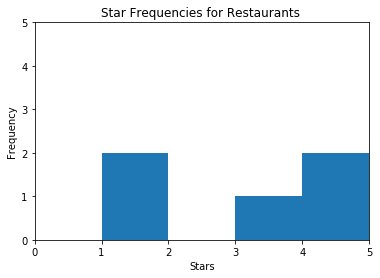

In [64]:
plt.hist(data.loc[:, 'stars'], bins=[1,2,3,4,5])
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.title('Star Frequencies for Restaurants ')
plt.axis([0,5,0,data.shape[0]])
plt.show()

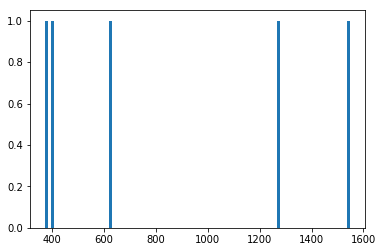

In [78]:
review_length = [len(review) for review in data.loc[:, 'text']]

#print(review_length)
plt.hist(review_length, 100)
plt.show()